Representantes de la American Heart Association planean ir de puerta en puerta por toda la comunidad, solicitando contribuciones. Por experiencias pasadas, saben que cuando alguien abre la puerta, el 80% de las veces es una mujer y el 20% de las veces es un hombre. También saben que el 70% de las mujeres que abren la puerta hacen una donación, mientras que solo el 40% de los hombres que abren la puerta hacen donaciones. La cantidad de dinero que aportan las mujeres sigue una distribución normal con una media de $20 y una desviación estándar de $3. La cantidad de dinero que aportan los hombres sigue una distribución normal con una media de $10 y una desviación estándar de $2. 

In [174]:
import numpy as np
import random
import matplotlib.pyplot as plt

Entradas Conocidas

In [175]:
prob_woman = 0.8  #Mujer abra la puerta
prob_donate_woman = 0.7  #Mujer done
prob_donate_man = 0.4  #Hombre done
mean_donation_woman = 20  #Media mujer done
dev_donation_woman = 3  #Desviación estándar mujer done
mean_donation_man = 10  #Media hombre done
dev_donation_man = 2  #Desviación estándar hombre done



(50%) Cree un modelo en Python que simule lo que podría suceder cada vez que un representante de la American Heart Association llama a la puerta y alguien responde

In [176]:
def simulate_donation():
    # Determinar el género de quien abre la puerta
    is_woman = random.choices([True, False], weights=[prob_woman, 1 - prob_woman])[0]
    
    # Determinar si dona y cuánto
    if is_woman:
        donates = random.choices([True, False], weights=[prob_donate_woman, 1 - prob_donate_woman])[0]
        donation_amount = np.random.normal(mean_donation_woman, dev_donation_woman) if donates else 0
    else:
        donates = random.choices([True, False], weights=[prob_donate_man, 1 - prob_donate_man])[0]
        donation_amount = np.random.normal(mean_donation_man, dev_donation_man) if donates else 0
    
    return round(donation_amount, 2)

In [177]:
def simulate_multiple_donations(n):
    donations = [simulate_donation() for _ in range(n)]
    return donations

(20%)¿Obtenga la función de incertidumbre (histograma) de la contribución que la Heart Association puede esperar recibir cuando alguien abre la puerta? 

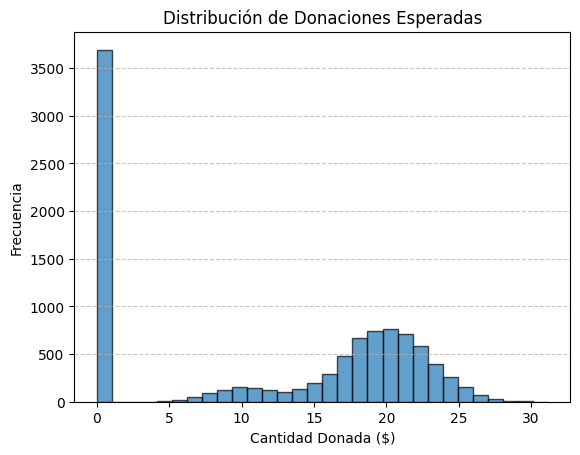

In [178]:
def plot_donation_distribution(n=10000):
    donations = simulate_multiple_donations(n)
    plt.hist(donations, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel("Cantidad Donada ($)")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de Donaciones Esperadas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    

# Simulación y gráfico
plot_donation_distribution()

(10%) ¿Cuál es la contribución promedio que la Heart Association puede esperar recibir cuando alguien abre la puerta? 

 

In [179]:
def expected_donation(n=100000):
    donations = simulate_multiple_donations(n)
    return np.mean(donations)

print(f"Contribución promedio esperada: ${expected_donation():.2f}")

Contribución promedio esperada: $12.02


(10%) Suponga que la Asociación del Corazón planea visitar 300 hogares un sábado determinado. Si nadie está en casa en el 25% de las residencias, ¿cuál es el monto total que la Asociación del Corazón puede esperar recibir en donaciones? 

 

In [180]:
def expected_donation(homes=300, empty_homes_ratio=0.25):
    empty_homes = int(homes * empty_homes_ratio)
    occupied_homes = homes - empty_homes 
    
    donations = [simulate_donation() for _ in range(occupied_homes)]
    return sum(donations)  

print(f"Monto total esperado en donaciones: ${expected_donation():.2f}")


Monto total esperado en donaciones: $2720.43


(10%) ¿Cuál es la probabilidad de que la contribución cuando alguien abra la puerta sea superior $21? 

 

In [181]:
def probability_donation_above21(n=10000):
    donations = simulate_multiple_donations(n)
    return np.mean([donation > 21 for donation in donations])

print(f"Probabilidad de que una donación sea mayor a $21: {probability_donation_above21():.2f}")

Probabilidad de que una donación sea mayor a $21: 0.21
